# Four Optimization Methods

In this notebook we show the results of 4 optimization methods applied to the task of 
build a reduced basis:

* Grid Search
* Random Search
* Bayesian Optimization (TPE)
* Covariance Matrix Adaptation Evolution Strategy or CMAES

We ran 40 different optimization tasks for each method (except for Grid Search) in order 
to compare how quickly they converge to the optimum value


Before showing anything, it is important to mention that the grid search took 25 hours to complete. On the other hand, the other three optimization methods took less than 15 minutes to run 100 iterations.

In [2]:
from skreducedmodel.reducedbasis import ReducedBasis, error, normalize_set
from optuna.samplers import TPESampler
import matplotlib.pyplot as plt
import numpy as np
import optuna 

# Random Search vs TPE vs CMAES

### Load and process data

(you can ignore the two following cells)

In [3]:
# Load Studies
tpe = []
random = []
cmaes = []

for method in ["TPEmv", "RANDOM2", "CmaEs2"]:   # ignore the weird names
    for i in range(40):
        study = optuna.load_study(study_name=f"{i}-1d{method}-ts200-vs300",
                                storage="sqlite:///studies-for-comparison.db")
        db = study.trials_dataframe()
        match method:
            case "TPEmv":
                tpe.append(db.value)
            case "RANDOM2":
                random.append(db.value)
            case "CmaEs2":
                cmaes.append(db.value)
tpe = np.asarray(tpe)
random = np.asarray(random)
cmaes = np.asarray(cmaes)

In [20]:
def get_min_values(arr):
    """
    we are intersted in how the minimum value evolves, not all of them
    """
    min_arr = [arr[0]]
    for a in arr[1:]:
        if a < min_arr[-1]:
            min_arr.append(a)
        else:
            min_arr.append(min_arr[-1])
    return np.array(min_arr)


tpe_mins = np.apply_along_axis(get_min_values, axis=1, arr=tpe) 
random_mins = np.apply_along_axis(get_min_values, axis=1, arr=random) 
cmaes_mins = np.apply_along_axis(get_min_values, axis=1, arr=cmaes) 

#### Example of evolution of min value (best error found at a given iteration). 
In the following plot, the dots represent the validation error at a given iteration, and the red dashed line shows us the evolution of the minimum value found.

Text(0, 0.5, 'Validation Error')

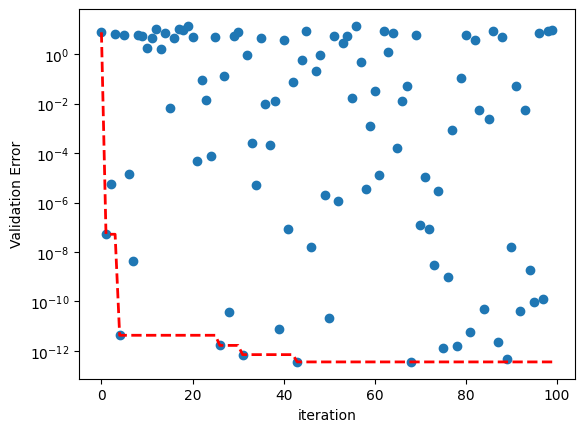

In [62]:
plt.scatter(range(100), random[1], marker="o")
plt.plot(random_mins[1], "r--", linewidth=2, label="best error found")
plt.yscale("log")
plt.xlabel("iteration")
plt.ylabel("Validation Error")

### Compare Mean Values

Here we see how the the mean of the best error found evolves in 50 iterations

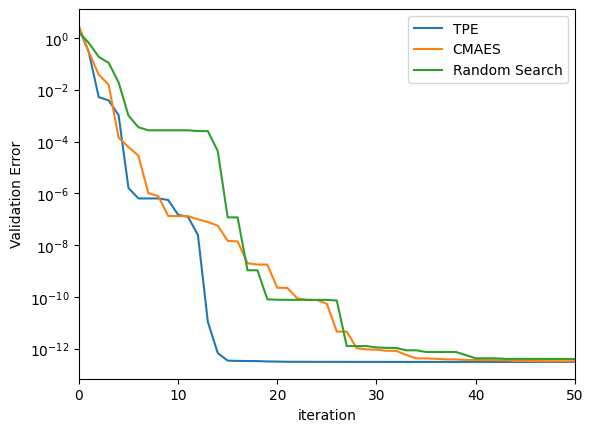

In [66]:
plt.plot(tpe_mins.mean(axis=0),label="TPE")
plt.plot(cmaes_mins.mean(axis=0),label="CMAES")
plt.plot(random_mins.mean(axis=0),label="Random Search")
plt.yscale("log")
plt.xlabel("iteration")
plt.ylabel("Validation Error")
plt.xlim(0, 50)
plt.legend()

### Compare Median

Now we use the median instead of the mean

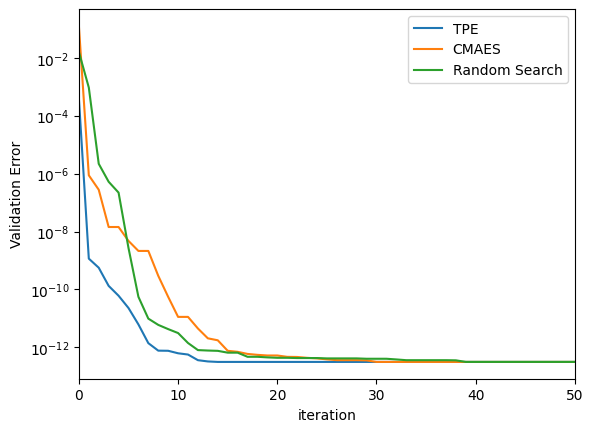

In [65]:
plt.plot(np.median(tpe_mins, axis=0) ,label="TPE")
plt.plot(np.median(cmaes_mins, axis=0) ,label="CMAES")
plt.plot(np.median(random_mins, axis=0) ,label="Random Search")
plt.yscale("log")
plt.xlabel("iteration")
plt.ylabel("Validation Error")
plt.xlim(0, 50)
plt.legend()

### Show all the range 

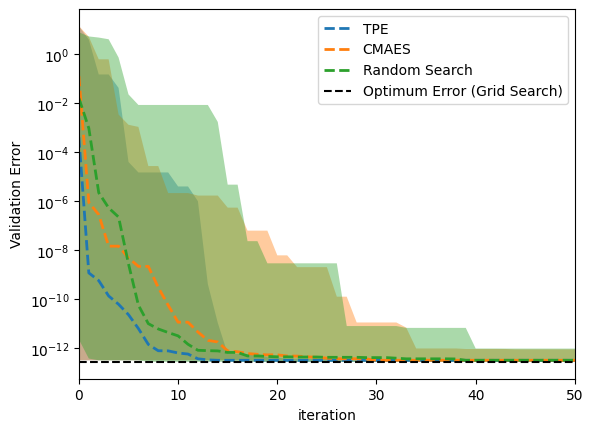

In [77]:
plt.plot(np.median(tpe_mins, axis=0), linewidth=2, linestyle="dashed" ,label="TPE")
plt.plot(np.median(cmaes_mins, axis=0), linewidth=2, linestyle="dashed" ,label="CMAES")
plt.plot(np.median(random_mins, axis=0), linewidth=2, linestyle="dashed" ,label="Random Search")

plt.fill_between(x = range(100),y1=tpe_mins.max(axis=0), y2=tpe_mins.min(axis=0), alpha=0.4)
plt.fill_between(x = range(100),y1=cmaes_mins.max(axis=0), y2=cmaes_mins.min(axis=0), alpha=0.4)
plt.fill_between(x = range(100),y1=random_mins.max(axis=0), y2=random_mins.min(axis=0), alpha=0.4)

plt.yscale("log")
plt.xlabel("iteration")
plt.ylabel("Validation Error")
plt.xlim(0, 50)

plt.hlines(y=2.698e-13, xmin=0, xmax=100, color="k", linewidth=1.5, linestyle="dashed", label="Optimum Error (Grid Search)")

plt.legend()

### TO DO

|     | TPE   | CMAES | RANDOM |
|-----|-------|-------|--------|
| AUC |       |       |        |
| Best y found | | |


# Grid Search

We can now see some plots of the grid search

In [84]:
import pandas as pd

grid_search = pd.read_csv("../../data/GridSearch1D.csv", index_col=0)

### Seed $q_0$

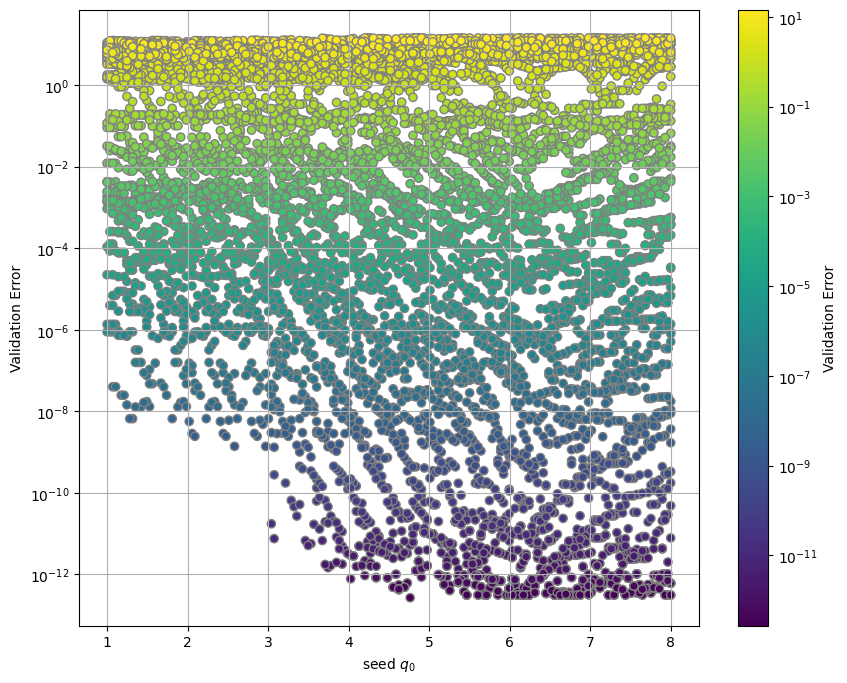

In [88]:
from matplotlib import colors

parameters_train = np.linspace(1, 8, 200)
x = parameters_train[grid_search.params_seed]
y = grid_search.value

norm = colors.LogNorm(min(grid_search.value), max(grid_search.value))
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c= grid_search.value, edgecolors="gray",norm=norm)
plt.grid()
plt.colorbar(label="Validation Error")
plt.xlabel(r"seed $q_0$")
plt.ylabel(r"Validation Error")
plt.yscale("log")

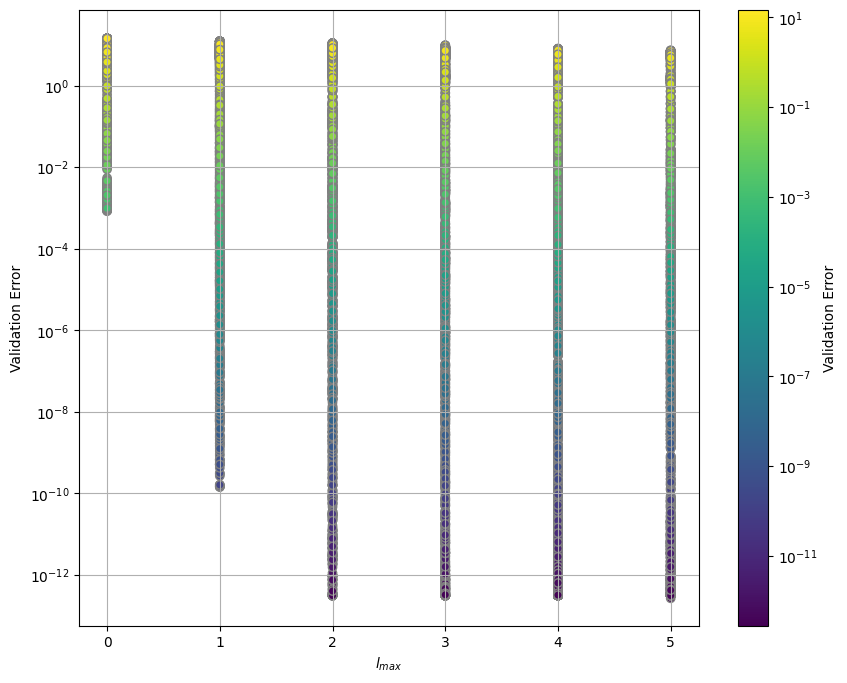

In [89]:
# seed
from matplotlib import colors

x = grid_search.params_lmax
y = grid_search.value

norm = colors.LogNorm(min(grid_search.value), max(grid_search.value))
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c= grid_search.value, edgecolors="gray",norm=norm)
plt.grid()
plt.colorbar(label="Validation Error")
plt.xlabel(r"$l_{max}$")
plt.ylabel(r"Validation Error")
plt.yscale("log")

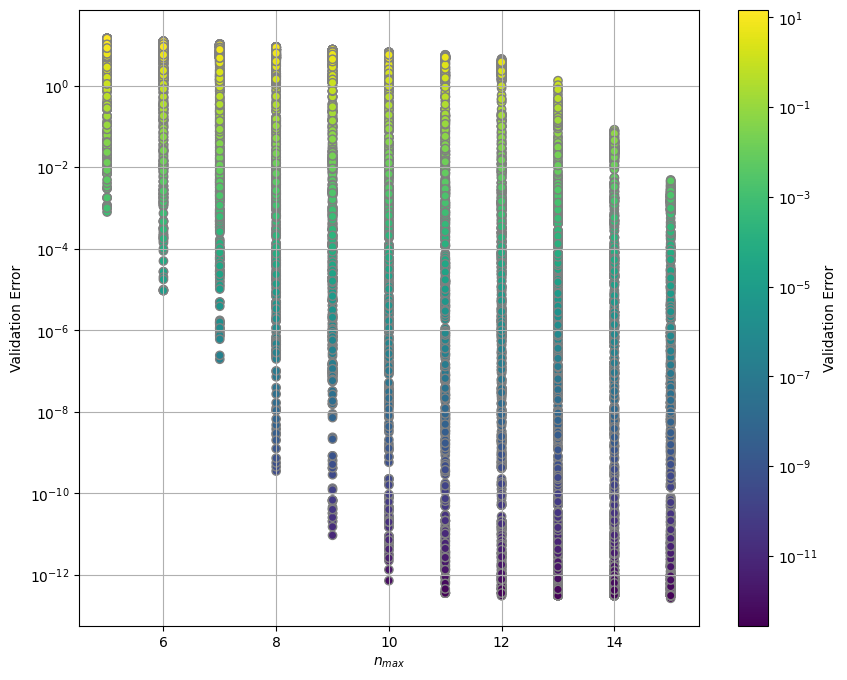

In [90]:
# seed
from matplotlib import colors

x = grid_search.params_nmax
y = grid_search.value

norm = colors.LogNorm(min(grid_search.value), max(grid_search.value))
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c= grid_search.value, edgecolors="gray",norm=norm)
plt.grid()
plt.colorbar(label="Validation Error")
plt.xlabel(r"$n_{max}$")
plt.ylabel(r"Validation Error")
plt.yscale("log")